## **IMPORT LIBRARIES AND DATA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data_midtown= pd.read_csv('G:/Semester 5/Workshop Analisis Media Sosial/data/data_midtown_baru.csv')
data_midtown.head()

,rating,tanggal
0,10.0,2022-11-18
1,10.0,2022-11-12
2,10.0,2022-09-11
3,10.0,2022-06-20
4,10.0,2022-03-26


In [3]:
data_lifestyle = pd.read_csv('G:/Semester 5/Workshop Analisis Media Sosial/data/data_lifestyle_baru.csv')
data_lifestyle.head()

,rating,tanggal
0,10.0,2023-08-30
1,10.0,2023-07-25
2,10.0,2023-07-10
3,10.0,2023-04-26
4,10.0,2023-01-14


## **EDA**

In [4]:
# Melihat dimensi data
print('Dimensi Data Midtown Hotel Surabaya Review: ', data_midtown.shape)
print('Dimensi Data The Life Style Hotel Surabaya Review: ',data_lifestyle.shape)

Dimensi Data Midtown Hotel Surabaya Review:  (508, 2)
Dimensi Data The Life Style Hotel Surabaya Review:  (1896, 2)


In [5]:
# Melihat informasi dataset
print('Informasi Data Midtown Hotel Surabaya Review')
print(data_midtown.info())

Informasi Data Midtown Hotel Surabaya Review
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   508 non-null    float64
 1   tanggal  508 non-null    object 
dtypes: float64(1), object(1)
memory usage: 8.1+ KB
None


In [6]:
# Melihat informasi dataset
print('Informasi Data The Life Style Hotel Surabaya Review')
print(data_lifestyle.info())

Informasi Data The Life Style Hotel Surabaya Review
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   1896 non-null   float64
 1   tanggal  1896 non-null   object 
dtypes: float64(1), object(1)
memory usage: 29.8+ KB
None


In [7]:
# Melihat analisis deskripsi untuk data bertipe numerik
print('Summary Statistik Data Midtown Hotel Surabaya Review')
print(data_midtown.describe())
print()
print('Summary Statistik Data The Life Style Hotel Surabaya Review')
print(data_lifestyle.describe())

Summary Statistik Data Midtown Hotel Surabaya Review
           rating
count  508.000000
mean     8.860236
std      1.078147
min      5.200000
25%      8.500000
50%      8.800000
75%      9.700000
max     10.000000

Summary Statistik Data The Life Style Hotel Surabaya Review
            rating
count  1896.000000
mean      8.393091
std       1.604032
min       4.500000
25%       6.700000
50%       8.800000
75%       9.700000
max      10.000000


## **PRE-PROCESSING DATA**

In [8]:
# Pemilihan fitur yang digunakan
selected_train = ['rating', 'tanggal']
data_midtown = data_midtown[selected_train]
data_lifestyle = data_lifestyle[selected_train]
#data_midtown = data_midtown.drop('nama', axis=1)
#data_lifestyle = data_lifestyle.drop('nama', axis=1)

In [9]:
# Melihat missing value pada data
print('Data Midtown Hotel Surabaya Review')
print(data_midtown.isna().sum())
print()
print('Data The Life Style Hotel Surabaya Review')
print(data_lifestyle.isna().sum())

Data Midtown Hotel Surabaya Review
rating     0
tanggal    0
dtype: int64

Data The Life Style Hotel Surabaya Review
rating     0
tanggal    0
dtype: int64


In [10]:
# Filter data berdasarkan tahun 2021-2023
start_year = 2021
end_year = 2023
data_midtown = data_midtown[(data_midtown['tanggal'].dt.year >= start_year) & (data_midtown['tanggal'].dt.year <= end_year)]
data_midtown = data_midtown.sort_values(by='tanggal')
data_midtown

AttributeError: Can only use .dt accessor with datetimelike values

In [11]:
# Filter data berdasarkan tahun 2021-2023
start_year = 2021
end_year = 2023
data_lifestyle = data_lifestyle[(data_lifestyle['tanggal'].dt.year >= start_year) & (data_lifestyle['tanggal'].dt.year <= end_year)]
data_lifestyle = data_lifestyle.sort_values(by='tanggal')
data_lifestyle

,rating,tanggal
794,10.0,2021-09-11
1488,6.5,2021-09-11
1478,6.5,2021-09-11
1468,6.5,2021-09-11
1033,9.7,2021-09-11
...,...,...
1380,8.2,2023-09-09
334,8.5,2023-09-09
1390,8.2,2023-09-09
160,8.5,2023-09-10


## **SENTIMEN ANALISIS**

In [12]:
# Convert rating agar mudah untuk melakukan sentimen analisis
# 1 = postif
# 0 = negatif
data_midtown['rating'] = data_midtown['rating'].apply(lambda x: 1 if x >= 8.5 else 0)
data_lifestyle['rating'] = data_lifestyle['rating'].apply(lambda x: 1 if x >= 8.5 else 0)

In [13]:
sentimen_midtown = data_midtown.rating.value_counts()
sentimen_midtown

1    442
0     66
Name: rating, dtype: int64

In [14]:
sentimen_lifestyle=data_lifestyle.rating.value_counts()
sentimen_lifestyle

1    1322
0     574
Name: rating, dtype: int64

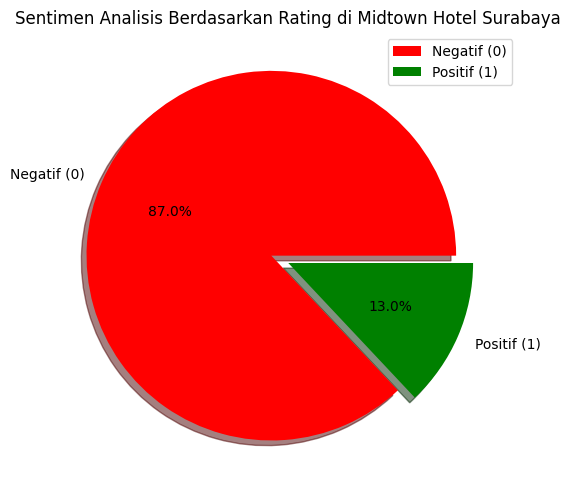

In [15]:
# Plotting Pie Chart berdasarkan rating di Midtown Hotel Surabaya
# Labels untuk pie chart
labels = ['Negatif (0)', 'Positif (1)']

# Warna untuk setiap sektor pie chart
colors = ['red', 'green']

# Eksplosi sektor (jika Anda ingin beberapa sektor menonjol)
explode = (0.1, 0)

plt.figure(figsize=(6, 6))  # Ukuran pie chart

# Membuat pie chart
plt.pie(sentimen_midtown, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)

# Menambahkan judul
plt.title('Sentimen Analisis Berdasarkan Rating di Midtown Hotel Surabaya')

# Menampilkan legenda
plt.legend(labels, loc='upper right')

# Menampilkan pie chart
plt.show()


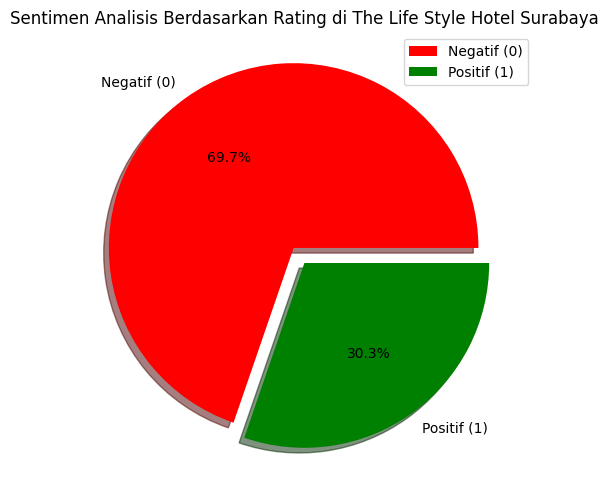

In [16]:
# Plotting Pie Chart berdasarkan rating di The Life Style Hotel Surabaya 
# Labels untuk pie chart
labels = ['Negatif (0)', 'Positif (1)']

# Warna untuk setiap sektor pie chart
colors = ['red', 'green']

# Eksplosi sektor (jika Anda ingin beberapa sektor menonjol)
explode = (0.1, 0)

plt.figure(figsize=(6, 6))  # Ukuran pie chart

# Membuat pie chart
plt.pie(sentimen_lifestyle, labels=labels, colors=colors,
        explode=explode, autopct='%1.1f%%', shadow=True)

# Menambahkan judul
plt.title('Sentimen Analisis Berdasarkan Rating di The Life Style Hotel Surabaya')

# Menampilkan legenda
plt.legend(labels, loc='upper right')

# Menampilkan pie chart
plt.show()

In [17]:
# Hitung persentase sentimen untuk Dataset 1
total_reviews_dataset1 = len(data_midtown)  # Total jumlah ulasan
positive_reviews_dataset1 = len(data_midtown[data_midtown['rating'] == 1])  # Jumlah ulasan positif
negative_reviews_dataset1 = len(data_midtown[data_midtown['rating'] == 0])  # Jumlah ulasan negatif
percent_positive_dataset1 = (positive_reviews_dataset1 / total_reviews_dataset1) * 100
percent_negative_dataset1 = (negative_reviews_dataset1 / total_reviews_dataset1) * 100

# Hitung persentase sentimen untuk Dataset 2
total_reviews_dataset2 = len(data_lifestyle)
positive_reviews_dataset2 = len(data_lifestyle[data_lifestyle['rating'] == 1])
negative_reviews_dataset2 = len(data_lifestyle[data_lifestyle['rating'] == 0])
percent_positive_dataset2 = (positive_reviews_dataset2 / total_reviews_dataset2) * 100
percent_negative_dataset2 = (negative_reviews_dataset2 / total_reviews_dataset2) * 100


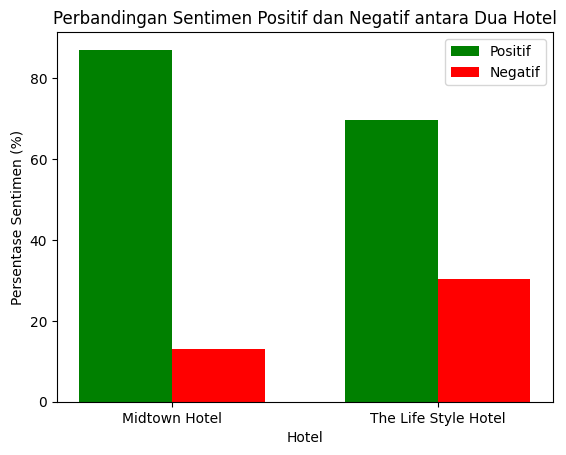

In [18]:
# Visualisasi Perbandingan Sentimen di Kedua Hotel dengan Bar Plot
# Label untuk dataset
labels = ['Midtown Hotel', 'The Life Style Hotel']

# Persentase sentimen dari kedua dataset
percent_positive = [percent_positive_dataset1, percent_positive_dataset2]
percent_negative = [percent_negative_dataset1, percent_negative_dataset2]

# Mengatur lebar bar
bar_width = 0.35

# Mengatur posisi x untuk dua grup bar
x = range(len(labels))

# Membuat subplot
fig, ax = plt.subplots()

# Membuat bar untuk sentimen positif
bar1 = ax.bar(x, percent_positive, bar_width, label='Positif', color='g')

# Membuat bar untuk sentimen negatif di sebelah kanan bar positif
bar2 = ax.bar([i + bar_width for i in x], percent_negative,
              bar_width, label='Negatif', color='r')

# Menambahkan label sumbu x
ax.set_xlabel('Hotel')
ax.set_ylabel('Persentase Sentimen (%)')
ax.set_title('Perbandingan Sentimen Positif dan Negatif antara Dua Hotel')

# Menambahkan label sumbu x pada posisi tengah grup bar
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)

# Menampilkan legenda
ax.legend()

# Menampilkan grafik
plt.show()


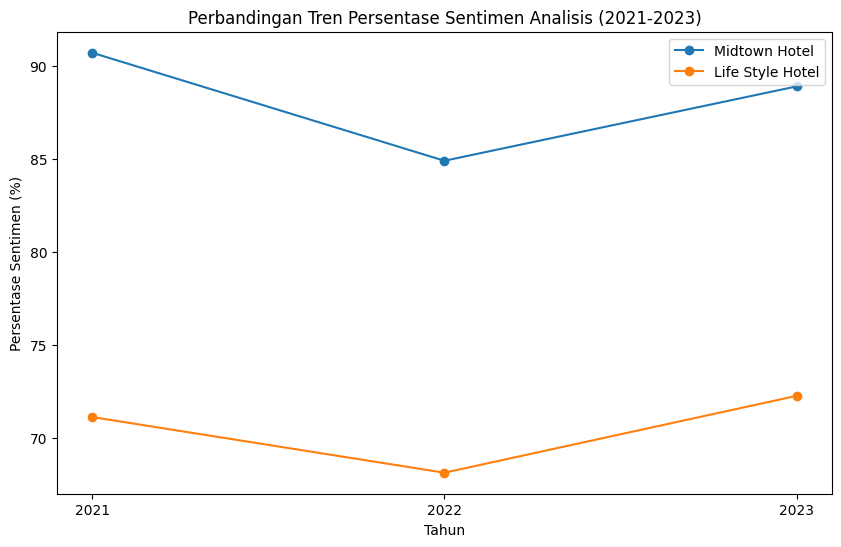

In [19]:
# Visualisasi grafik line chart untuk melihat rating di tahun 2021-2023
# Filter data untuk tahun 2021-2023 untuk kedua dataset
filtered_df1 = data_midtown[(data_midtown['tanggal'] >= '2021-01-01') &
                            (data_midtown['tanggal'] <= '2023-12-31')]
filtered_df2 = data_lifestyle[(data_lifestyle['tanggal'] >= '2021-01-01') &
                              (data_lifestyle['tanggal'] <= '2023-12-31')]

# Groupby tahun dan hitung persentase rata-rata sentimen per tahun untuk kedua dataset
sentimen_per_tahun1 = filtered_df1.groupby(filtered_df1['tanggal'].dt.year)[
    'rating'].mean() * 100
sentimen_per_tahun2 = filtered_df2.groupby(filtered_df2['tanggal'].dt.year)[
    'rating'].mean() * 100

# Plot grafik multi-line chart
plt.figure(figsize=(10, 6))
plt.plot(sentimen_per_tahun1.index, sentimen_per_tahun1.values,
         marker='o', linestyle='-', label='Midtown Hotel')
plt.plot(sentimen_per_tahun2.index, sentimen_per_tahun2.values,
         marker='o', linestyle='-', label='Life Style Hotel')

# Tambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Persentase Sentimen (%)')
plt.title('Perbandingan Tren Persentase Sentimen Analisis (2021-2023)')

# Atur label sumbu x
plt.xticks([2021, 2022, 2023])

# Tampilkan grafik
plt.legend()
plt.show()

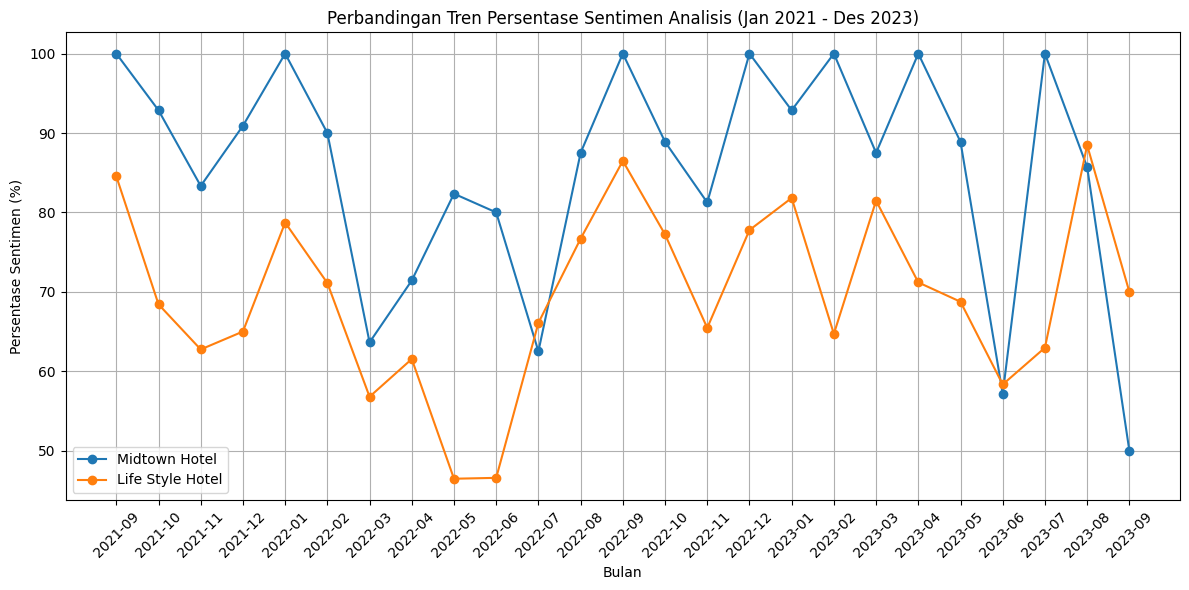

In [20]:
# Filter data untuk bulan Januari 2021 hingga Desember 2023 untuk kedua dataset
filtered_df1 = data_midtown[(data_midtown['tanggal'] >= '2021-01-01') &
                            (data_midtown['tanggal'] <= '2023-12-31')]
filtered_df2 = data_lifestyle[(data_lifestyle['tanggal'] >= '2021-01-01') &
                              (data_lifestyle['tanggal'] <= '2023-12-31')]

# Groupby tahun dan bulan, kemudian hitung rata-rata sentimen per bulan untuk kedua dataset
sentimen_per_bulan1 = filtered_df1.groupby(
    [filtered_df1['tanggal'].dt.year, filtered_df1['tanggal'].dt.month])['rating'].mean() * 100
sentimen_per_bulan2 = filtered_df2.groupby(
    [filtered_df2['tanggal'].dt.year, filtered_df2['tanggal'].dt.month])['rating'].mean() * 100

# Ubah indeks menjadi bulan dan tahun
sentimen_per_bulan1.index = [
    f'{year}-{month:02}' for year, month in sentimen_per_bulan1.index]
sentimen_per_bulan2.index = [
    f'{year}-{month:02}' for year, month in sentimen_per_bulan2.index]

# Plot grafik multi-line chart
plt.figure(figsize=(12, 6))
plt.plot(sentimen_per_bulan1.index, sentimen_per_bulan1.values,
         marker='o', linestyle='-', label='Midtown Hotel')
plt.plot(sentimen_per_bulan2.index, sentimen_per_bulan2.values,
         marker='o', linestyle='-', label='Life Style Hotel')

# Tambahkan label dan judul
plt.xlabel('Bulan')
plt.ylabel('Persentase Sentimen (%)')
plt.title('Perbandingan Tren Persentase Sentimen Analisis (Jan 2021 - Des 2023)')

# Atur interval label pada sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Tampilkan grafik
plt.grid(True)
plt.legend()
plt.show()

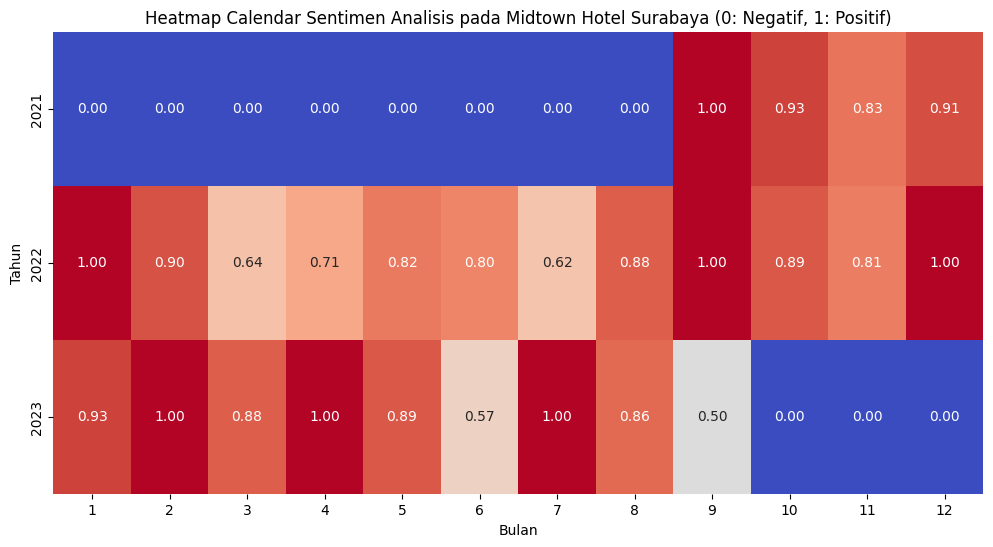

In [21]:
# Visualisasi HeatMap Calendar pada Midtown Hotel Surabaya
# Set kolom 'Tanggal' sebagai indeks
data_midtown.set_index('tanggal', inplace=True)

# Ekstrak tahun dan bulan ke kolom terpisah
data_midtown['Tahun'] = data_midtown.index.year
data_midtown['Bulan'] = data_midtown.index.month

# Buat matriks berisi sentimen
pivot_data = data_midtown.pivot_table(index='Tahun', columns='Bulan', values='rating', aggfunc='mean')
pivot_data = pivot_data.fillna(0)

# Buat heatmap calendar dengan seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Heatmap Calendar Sentimen Analisis pada Midtown Hotel Surabaya (0: Negatif, 1: Positif)')
plt.show()


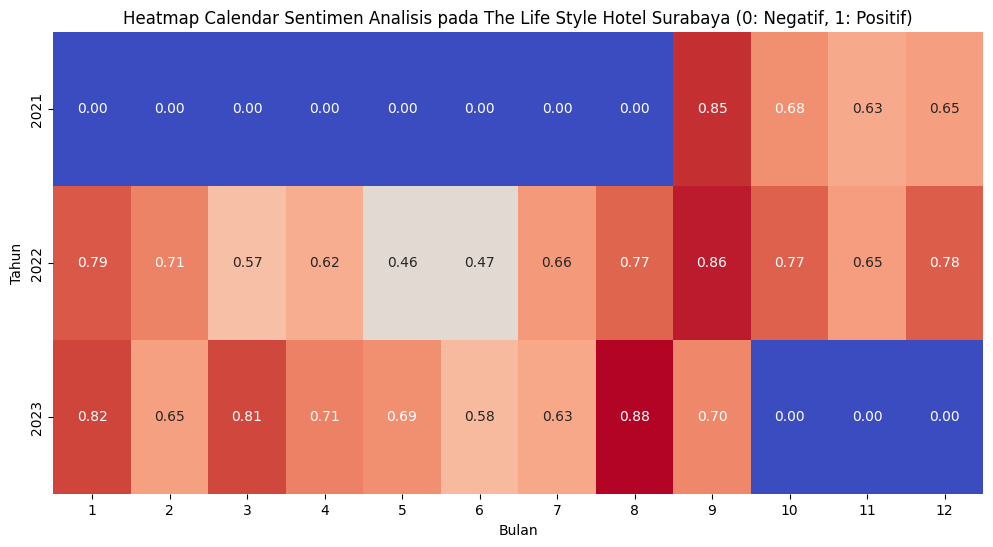

In [22]:
# Visualisasi HeatMap Calendar pada The Life Style Hotel Surabaya
# Set kolom 'Tanggal' sebagai indeks
data_lifestyle.set_index('tanggal', inplace=True)

# Ekstrak tahun dan bulan ke kolom terpisah
data_lifestyle['Tahun'] = data_lifestyle.index.year
data_lifestyle['Bulan'] = data_lifestyle.index.month

# Buat matriks berisi sentimen
pivot_data = data_lifestyle.pivot_table(
    index='Tahun', columns='Bulan', values='rating', aggfunc='mean')
pivot_data = pivot_data.fillna(0)

# Buat heatmap calendar dengan seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Heatmap Calendar Sentimen Analisis pada The Life Style Hotel Surabaya (0: Negatif, 1: Positif)')
plt.show()